In [17]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [18]:
# Load dataset
df = pd.read_csv('train_data_final.csv')
test_df = pd.read_csv('test_data_final.csv')

In [19]:
# Get a list of all the column names
ColumnNamesList = df.columns.values

## Print the number of missing values in all variables
for name in ColumnNamesList:
    total_nas=df[name].isna().sum()
    print(name, ":", total_nas)

Unnamed: 0 : 0
F0semitoneFrom27.5Hz_sma3nz_amean : 1
F0semitoneFrom27.5Hz_sma3nz_stddevNorm : 1
F0semitoneFrom27.5Hz_sma3nz_percentile20.0 : 1
F0semitoneFrom27.5Hz_sma3nz_percentile50.0 : 1
F0semitoneFrom27.5Hz_sma3nz_percentile80.0 : 1
F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2 : 1
F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope : 1
F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope : 1
F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope : 1
F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope : 1
loudness_sma3_amean : 1
loudness_sma3_stddevNorm : 1
loudness_sma3_percentile20.0 : 1
loudness_sma3_percentile50.0 : 1
loudness_sma3_percentile80.0 : 1
loudness_sma3_pctlrange0-2 : 1
loudness_sma3_meanRisingSlope : 1
loudness_sma3_stddevRisingSlope : 1
loudness_sma3_meanFallingSlope : 1
loudness_sma3_stddevFallingSlope : 1
spectralFlux_sma3_amean : 1
spectralFlux_sma3_stddevNorm : 1
mfcc1_sma3_amean : 1
mfcc1_sma3_stddevNorm : 1
mfcc2_sma3_amean : 1
mfcc2_sma3_stddevNorm : 1
mfcc3_sma3_amean : 1
mfcc3_sma3_stddevNo

In [20]:
# Find index of empty row
nullRow = df[df.isnull().any(axis=1)]

# Remove empty row
df = df[df.index != nullRow.index[0]]

In [21]:
# Get a list of all the column names
ColumnNamesList = df.columns.values

## Print the number of missing values in all variables
for name in ColumnNamesList:
    total_nas=df[name].isna().sum()
    print(name, ":", total_nas)

Unnamed: 0 : 0
F0semitoneFrom27.5Hz_sma3nz_amean : 0
F0semitoneFrom27.5Hz_sma3nz_stddevNorm : 0
F0semitoneFrom27.5Hz_sma3nz_percentile20.0 : 0
F0semitoneFrom27.5Hz_sma3nz_percentile50.0 : 0
F0semitoneFrom27.5Hz_sma3nz_percentile80.0 : 0
F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2 : 0
F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope : 0
F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope : 0
F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope : 0
F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope : 0
loudness_sma3_amean : 0
loudness_sma3_stddevNorm : 0
loudness_sma3_percentile20.0 : 0
loudness_sma3_percentile50.0 : 0
loudness_sma3_percentile80.0 : 0
loudness_sma3_pctlrange0-2 : 0
loudness_sma3_meanRisingSlope : 0
loudness_sma3_stddevRisingSlope : 0
loudness_sma3_meanFallingSlope : 0
loudness_sma3_stddevFallingSlope : 0
spectralFlux_sma3_amean : 0
spectralFlux_sma3_stddevNorm : 0
mfcc1_sma3_amean : 0
mfcc1_sma3_stddevNorm : 0
mfcc2_sma3_amean : 0
mfcc2_sma3_stddevNorm : 0
mfcc3_sma3_amean : 0
mfcc3_sma3_stddevNo

In [22]:
# Check for potentially incorrect valuese
df.describe()

,Unnamed: 0,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,...,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,Participant_ID,Depression,Gender
count,13625.000000,13625.000000,13625.000000,13625.000000,13625.000000,13625.000000,13625.000000,13625.000000,13625.000000,13625.000000,...,13625.000000,13625.000000,13625.000000,13625.000000,13625.000000,13625.000000,13625.000000,13625.000000,13625.000000,13625.000000
mean,6812.774606,25.745292,0.076929,24.278258,25.694211,27.268849,2.990591,82.345260,69.587039,25.355152,...,3.971591,2.477241,0.241971,0.112241,0.191788,0.102848,-42.388196,397.119706,0.288587,0.600147
std,3933.645467,7.797542,0.056443,7.584515,7.895070,8.347925,2.703251,121.029574,111.085653,67.914686,...,1.650809,1.180545,0.171297,0.099238,0.335345,0.123444,7.192831,51.145327,0.453122,0.489886
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-228.022810,0.000000,-734.346100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-120.000000,303.000000,0.000000,0.000000
25%,3407.000000,21.714222,0.037168,20.299099,21.492850,22.833477,1.353430,15.516853,1.467776,6.568803,...,3.043478,1.834862,0.140000,0.016330,0.100000,0.026247,-45.757977,357.000000,0.000000,0.000000
50%,6813.000000,25.459585,0.067140,23.648668,25.291498,27.103271,2.330517,49.589092,30.792398,15.679526,...,3.896104,2.419355,0.207174,0.104983,0.142857,0.077037,-41.693493,391.000000,0.000000,1.000000
75%,10219.000000,31.411427,0.103485,30.213726,31.667706,33.141975,3.769505,108.683495,99.414925,26.759731,...,4.761905,3.030303,0.296667,0.168688,0.204000,0.144724,-38.288914,443.000000,1.000000,1.000000
max,13625.000000,62.197670,0.571825,62.193268,62.207660,62.210110,43.667380,4072.700200,1975.245400,3777.268300,...,29.166668,25.000000,2.450000,1.125000,10.429999,3.449389,-17.723944,491.000000,1.000000,1.000000


In [23]:
# Check for null values in test data
test_df.isna().sum().any()

False

In [24]:
# Calculate the percentage of zero values in each row
zero_percentages = (df == 0).mean(axis=1)

# Filter out rows where more than half of the feature values are zero
threshold = 0.5  # More than half
df = df[zero_percentages <= threshold]

# Check if any rows are duplicated
df[df.duplicated()] # No rows are duplicated

,Unnamed: 0,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,...,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,Participant_ID,Depression,Gender


In [25]:
# Calculate the percentage of zero values in each row of test data
zero_percentages = (test_df == 0).mean(axis=1)

# Filter out rows where more than half of the feature values are zero
threshold = 0.5  # More than half
test_df = test_df[zero_percentages <= threshold]

# Check if any rows are duplicated
test_df[test_df.duplicated()] # No rows are duplicated

,Unnamed: 0,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,...,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,Participant_ID,Depression,Gender


In [26]:
# Extract X variables
X = df.drop(columns=["Depression", "Gender", "Participant_ID"])

# Extract y variables
y = df[["Depression", "Gender", "Participant_ID"]]

In [27]:
# Extract X variables
X_test = test_df.drop(columns=["Depression", "Gender", "Participant_ID"])

# Extract y variables
y_test = test_df[["Depression", "Gender", "Participant_ID"]]

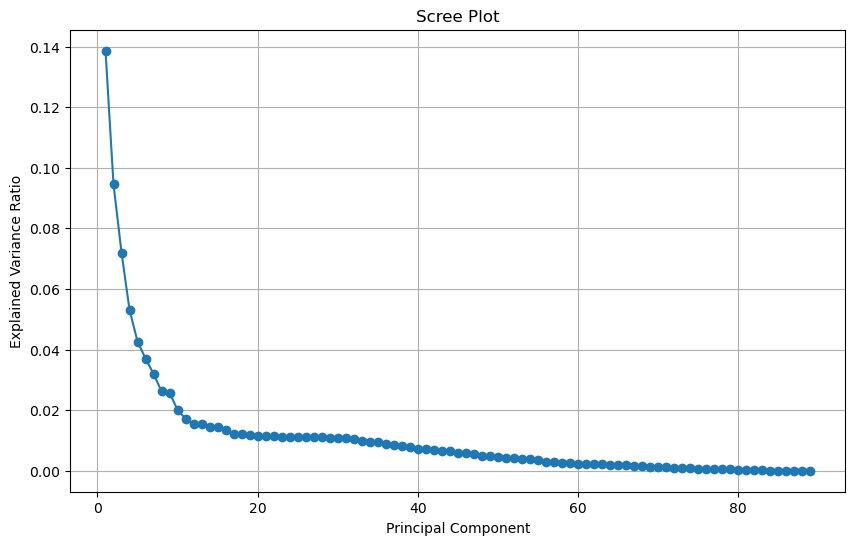

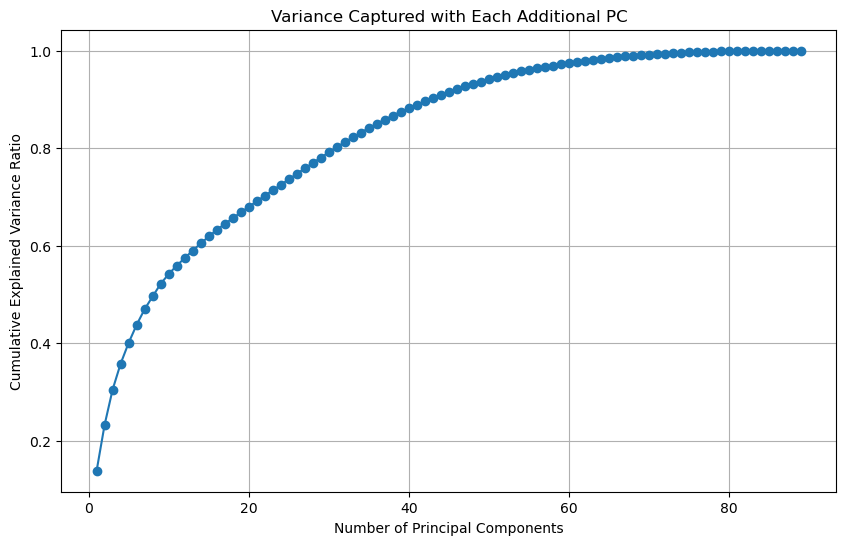

In [28]:
# Standardize X variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# Perform PCA
pca = PCA()
X_PCA = pca.fit_transform(X_scaled)
X_PCA_test = pca.transform(X_test_scaled)

# Calculate explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Plot scree plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
# plt.savefig('scree')
plt.show()

# Calculate cumulative explained variance ratio
cumulative_explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot variance captured with each additional PC
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(cumulative_explained_variance_ratio) + 1), cumulative_explained_variance_ratio, marker='o', linestyle='-')
plt.title('Variance Captured with Each Additional PC')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
# plt.savefig('PCACumulative')
plt.show()

In [29]:
# Create a df for selected principal components

numPCs = 20 # select 20 PCs based on Scree Plot

X_pca_subset = X_PCA[:, :numPCs]
X_test_pca_subset = X_PCA_test[:, :numPCs]

columns = [f"PC{i+1}" for i in range(20)]
X_PCA_df = pd.DataFrame(X_pca_subset, columns=columns)
X_PCA_test_df = pd.DataFrame(X_test_pca_subset, columns=columns)

# Concatenate X_pca_df and y to get the final DataFrame
PCA_df = pd.concat([X_PCA_df.reset_index(drop=True), y.reset_index(drop=True)], axis=1)
PCA_test_df = pd.concat([X_PCA_test_df.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1)

In [30]:
# Cleaned data
df.to_csv('clean_df.csv', index=False)
test_df.to_csv('clean_test_df.csv', index=False)

# PCA data
PCA_df.to_csv('PCA_df.csv', index=False)
PCA_test_df.to_csv('PCA_test_df.csv', index=False)